# Antoine Database

The purpose of this notebook is to demonstrate the use of Google Sheets as a data repository for use within a Jupyter notebook.

### Read Google Sheet

In [12]:
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/1lqIWdnmjiZX2LwHZ_5TdPXDOEn8hp-ZkdONlbjA-P1k/export?format=csv&id')
data = r.content

In [42]:
from StringIO import StringIO
import pandas as pd
adb = pd.io.parsers.read_csv(StringIO(data),index_col=0)
adb

,Tmin,Tmax,A,B,C
Species,,,,,
Acetaldehyde,-45,70,8.00550,1600.000,291.800
Acetic Acid,NaN,NaN,7.38782,1533.313,222.309
Benzene,8,103,6.90565,1211.033,220.790


### Do something interesting with the data

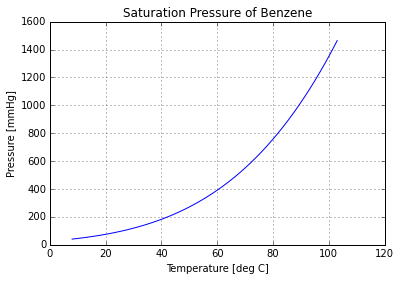

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

species = 'Benzene'

T = np.linspace(adb.ix[species]['Tmin'],adb.ix[species]['Tmax'])

def Psat(s,T):
    return 10.0**(adb.ix[s]['A'] - adb.ix[s]['B']/(T + adb.ix[s]['C']) )

plt.plot(T,Psat(species,T))
plt.xlabel('Temperature [deg C]')
plt.ylabel('Pressure [mmHg]')
plt.title('Saturation Pressure of ' + species)
plt.grid()